# <span align="center">Quantifying The World Case Study Unit 10 - Missing Data Imputation</span>
### <span align="right">Ryan Bass and Brett Benefield </span>
### <span align="right">March 21, 2019</span>

# Introduction

A common misconception outside of the Data Science profession is that in any given dataset the data is perfect. It has no missing values, how the information is encoded is clear and concise, and no additional work needs to be done. In reality, this is never the case. Data will be missing, inaccurate, and often compiled from many different sources. There can be variables where nearly all of the data is missing. The question now becomes, how do we best deal with this missing data? It is the work of the Data Scientist to explore the data and determine how best to handle the missing data. This step is known as imputation. This might include working closely with a Subject Matter Expert (SME), using statical analysis on the data to replace with a likely answer, removing rows of data with missing values, or even a best guess.

In the procedures and analysis performed below, we will explore the consequences of removing data from a dataset, imputing new values, and assessing the performance of a linear regression model compared to a baseline model where all values are known.

# Methods

### Missing Data

In order to deal with missing data, it is important to understand how the data is missing.

There are three categories of missing data:

- Missing Completely at Random (MCAR)
- Missing at Random (MAR)
- Missing not at Random (MNAR)

#### Missing Completely at Random
In this category, there appears to be no discernable pattern to the missing data. From a statistical point of view, it is as equally likely that the data is recorded as it is missing.

#### Missing at Random
In this category, it appears that the data is missing to a specific subset of data; however, within that subset, it is as equally likely that the data is recorded as it is missing.

#### Missing Not at Random
In this category, there is a discernable pattern to the missing data.

### Imputation

Once it is determined how the data is missing, one or more methods below can be employed.

There are four common ways to impute missing data:

- Listwise Deletion
- Pairwise Deletion
- Single Imputation
- Hot Deck

#### Listwise Deletion
The listwise deletion method drops any row that has any missing data. This method should almost never be used. While removing the row removes the issue of missing data, it also deletes valuable data that can be used for other analysis. Data should be treated as sacred.

#### Pairwise Deletion
The pairwise method involves omitting a row of data if a value is missing in a given column(s), but keeping that row for analysis on other columns. This option is better than listwise deletion but care must be used if the percentage of missing values in the different columns are significantly different.

#### Single Imputation
The single imputation method tries to leverage patterns within the data to impute a likely value. Using this method, other columns of data are considered. If the non-missing values in a column follow a trend based on another column then that other column can be used to impute a value for the remaining missing values.

#### Hot Deck
The hot deck method takes single imputation a step further. This method again looks for patterns or trends in other columns to help impute the missing values. However, a better guess might be dependent on a subset of another column(s) of data. In this case, instead of using a general trend across a column, we subset the data and determine sub-trend between the columns.

### Loss Function

We will be utilizing the common regression loss function root mean squared error (RMSE). RMSE measures the square root of the differences between all of the prediction's and their actual observations squared and summed. We chose this over mean absolute error (MAE) because RMSE penalizes outliers more than MAE does. The formula for RMSE can be found here:

$ RMSE = \sqrt{\frac{1}{n}\sum_{j=1}^n(y_j-\hat{y_j})^2} $

### Dataset 

To explore the use of imputation and the effect on our models we will be using the Boston dataset provided by the scikit-learn library. This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.The Boston dataset consists of housing prices for various housing in the Boston area. The dataset also includes extra attributes defined in the table below. We will be focusing on predicting the value of the MEDV column. This column represents the median value of owner-occupied homes in \\$1,000s.

| Column Name |                              Description                              |
|-------------|:---------------------------------------------------------------------:|
| CRIM        | per capita crime rate by town                                         |
| ZN          | proportion of residential land zoned for lots over 25,000 sq.ft.      |
| INDUS       | proportion of non-retail business acres per town                      |
| CHAS        | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) |
| NOX         | nitric oxides concentration (parts per 10 million)                    |
| RM          | average number of rooms per dwelling                                  |
| AGE         | proportion of owner-occupied units built prior to 1940                |
| DIS         | weighted distances to five Boston employment centres                  |
| RAD         | index of accessibility to radial highways                             |
| TAX         | full-value property-tax rate per \\$10,000                            |
| PTRATIO     | pupil-teacher ratio by town                                           |
| B           | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town        |
| LSTAT       | Percentage lower status of the population                             |
| MEDV        | Median value of owner-occupied homes in \\$1,000's                    |

Table 1 - Attributes in the Boston Housing dataset

### Models

#### Baseline Model

To establish a baseline we will train a linear regression model on all features with no missing values. We will hold back 20% of the data to use as our test set and all remaining data as our training set. This will allow us to assess the impact on imputing missing values in various models with data missing based on the three categories defined above (MCAR, MAR, MNAR). We will use the Root Mean Squared Error (RMSE) to assess the performance of our models.

|     Model    | RMSE |
|:------------:|------|
| Training_Set | 4.66 |
| Test_Set     | 4.87 |

Table 2 - Baseline Linear Regression Model Performance

#### Missing Completely At Random (MCAR) Model

With our baseline established, we will begin to explore the various types of missing data. The first type of missing data is Missing Completely at Random (MCAR). To simulate this, we randomly sample rows from the AGE column and replace the value with the value python uses for missing data, NaN (Not a Number). The number of rows is dependent on the percentage of values we want to simulate as missing. The missing values range from 1 to 50%. Next, we replace all values that are missing and replace it with the mean value for the remaining data in the AGE column. The performance of each model as shown below.

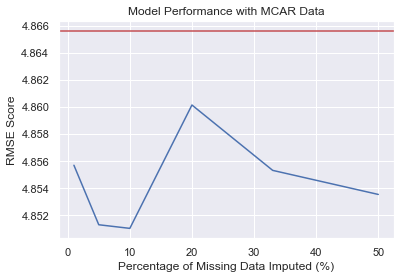

In [20]:
plotMCAR()

Figure 1 - Model Performance with Various Percentage of MCAR Data and Imputation

| Percentage (%) | Training Set RMSE | Test Set RMSE |
|----------------|-------------------|---------------|
| 1              |              4.66 |          4.86 |
| 5              |              4.66 |          4.85 |
| 10             |              4.66 |          4.85 |
| 20             |              4.66 |          4.86 |
| 33             |              4.66 |          4.86 |
| 50             |              4.66 |          4.85 |

Table 3: Model Performance with Various Percentage of MCAR Data and Imputation

#### Missing At Random (MAR) Model

The next type of missing data is Missing at Random (MAR). To simulate this situation, we select all rows that have an AGE value greater than 80. From this subset of data, we randomly select rows and replace the TAX or CRIM value with NaN. We do this with the percentage of data missing from 10 to 30%. We then replace the NaN values with the mean value of that column on the remaining data. The performance of each model can be seen below. 

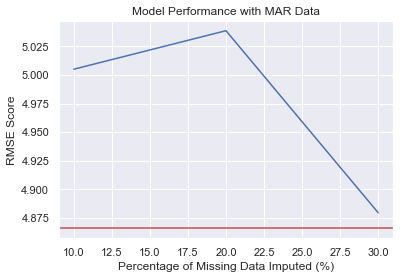

In [21]:
plotMAR()

Figure 2 - Model Performance with Various Percentage of MAR Data and Imputation

| Percentage (%) | Training Set RMSE | Test Set RMSE |
|----------------|-------------------|---------------|
| 10             |              4.68 |          5.01 |
| 20             |              4.70 |          5.04 |
| 30             |              4.70 |          4.88 |

Table 4 - Model Performance with Various Percentage of MAR Data and Imputation

#### Missing Not At Random (MNAR) Model

Finally we simulate Missing Not at Random (MNAR) data. To simulate this situation, we select all rows between the 25th and 50th quartile and replace the AGE values with NaN. Again we replace the NaN values with the mean value of the AGE column of the remaining data. The performance of the model is shown below.

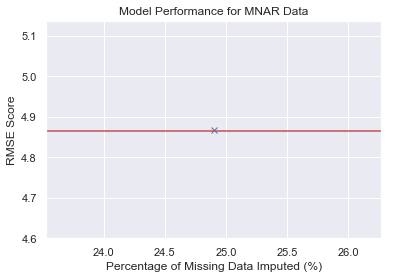

In [22]:
plotMNAR()

Figure 3 - Model Performance with 24.90% of MNAR Data and Imputation

| Percentage (%) | Training Set RMSE | Test Set RMSE |
|----------------|-------------------|---------------|
| 24.90          |              4.66 |          4.87 |

Table 5 - Model Performance with 24.90% of MNAR Data and Imputation

# Results
When comparing to the baseline linear regression model (Table 6) we found that data that is missing completely at random (MCAR) has very little effect on the model's error when imputed with the columns mean. This holds true from imputing 1% to 50% of the data.  Missing at random (MAR) does have the most significant impact of the methods of missing data. The most significant impact was with imputing 10% and 20% of the data with the mean by it adding 0.14 and 0.17 RMSE respectively when compared to the baseline model. When we imputed 30% of the data with the remaining means it actually improved the RMSE compared to the baseline model. Future further analysis should confirm this by alternating random_state seeds to confirm or reject this reproducibility. Lastly, missing not at random (MNAR) data by imputing the remaining mean of 25% of the data yielded the same RMSE as the baseline model.

| Missing Data Type | Percentage of Data Imputed (%) | Delta to Baseline (RMSE) |
|-------------------|----------------|--------------|
| MCAR              | 1              |         0.01 |
| MCAR              | 5              |         0.02 |
| MCAR              | 10             |         0.02 |
| MCAR              | 20             |         0.01 |
| MCAR              | 33             |         0.01 |
| MCAR              | 50             |         0.02 |
| MAR               | 10             |         0.14 |
| MAR               | 20             |         0.17 |
| MAR               | 30             |        +0.01 |
| MNAR              | 24.90          |         0.00 |

Table 6 - Overall Model Performance for Each Missing Data Type and Percentage of Missing Data. A + sign indicates it performed better than the baseline

# Discussion

Our results revealed that imputing the remaining mean on columns is a very sound approach when building a machine learning model. The only instance where it is somewhat concerning is when data is missing at random (MAR). This happened when we deleted 10-20% of our data when AGE was greater than or equal to 80 (greater than 80% of the homes were built before 1940) and our RMSE increased the most. However, this was all but eliminated when we imputed 30%. This could be due to the random_state seed which randomly selected rows to delete with the least important values for the linear regression model. Re-doing the analysis with cross-validation and averaging the RMSE and noting the standard deviation could remedy this anomaly.

Further analysis can be conducted on columns with more variabilty to find if that effects the accuracy of a model. With a variable like AGE that has a range of 0-100 we could find variables that are not ratios that increase the dynamic range of values. Also we can check if larger data sets invalidate our findings as well since this Boston Housing data set only contains 506 instances.

Overall we found that imputation of data can maintain a very accurate model when compared to a clean dataset. When conducting imputation on actual data sets it must be noted as to how many values of what variables are missing and how the imputation was carried out (mean, median, or even building a model to impute values).

# Supplemental Code

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  
import seaborn as sns

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

%matplotlib inline

#Function for Root mean squared error
#https://stackoverflow.com/questions/17197492/root-mean-square-error-in-python
def rmse(y_actual, y_predicted):
    return np.sqrt(mean_squared_error(y_actual, y_predicted))


def plotMCAR():
    percentage = [1,5,10,20,33,50]
    plt.plot(percentage, mcarValues)
    plt.axhline(baselineScore, color='r')
    plt.title("Model Performance with MCAR Data")
    plt.xlabel("Percentage of Missing Data Imputed (%)")
    plt.ylabel("RMSE Score")


def plotMAR():
    percentage = [10, 20, 30]
    plt.plot(percentage, marValues)
    plt.axhline(baselineScore, color='r')
    plt.title("Model Performance with MAR Data")
    plt.xlabel("Percentage of Missing Data Imputed (%)")
    plt.ylabel("RMSE Score")


def plotMNAR():
    percentage = 24.9
    plt.plot(percentage, mnarValue, marker='x')
    plt.axhline(baselineScore, color='r')
    plt.title("Model Performance for MNAR Data")
    plt.xlabel("Percentage of Missing Data Imputed (%)")
    plt.ylabel("RMSE Score")

    
boston = datasets.load_boston() #Load the boston dataset.

In [2]:
####################################################
################## baseline model ##################
####################################################

# Create feature matrix
X = boston.data

# Create target vector
y = boston.target

#credit: https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=24)

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmseTrainScore = rmse(y_train, y_train_predict)

print("The base model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmseTrainScore))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmseTestScore = rmse(y_test, y_test_predict)

print("The base model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmseTestScore))

baselineScore = rmseTestScore

The base model performance for training set
--------------------------------------
RMSE is 4.663552600421209


The base model performance for testing set
--------------------------------------
RMSE is 4.865643271113772


In [10]:
dfBoston = pd.DataFrame(boston.data, columns=boston.feature_names)
dfBoston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
dfBoston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [12]:
dfBoston['AGE'].describe()

count    506.000000
mean      68.574901
std       28.148861
min        2.900000
25%       45.025000
50%       77.500000
75%       94.075000
max      100.000000
Name: AGE, dtype: float64

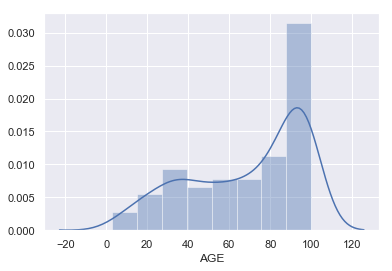

In [13]:
sns.set(color_codes=True)
sns.distplot(dfBoston['AGE']);

In [14]:
####################################################
########## completely at random models #############
####################################################

y = boston.target
lin_model = LinearRegression()
percentages = [0.01, 0.05, 0.10, 0.20, 0.33, 0.50] #percent of data we'll delete and impute
mcarValues = []

for percent in percentages:
    dfBostonStep2 = pd.DataFrame(boston.data, columns=boston.feature_names) #make data a dataframe
    series = dfBostonStep2['AGE'].sample(frac=percent, random_state=24) #randomly sample % of values in AGE column (forms a Series)
    for i in series.index:
        dfBostonStep2.iloc[i, 6] = np.nan #take those sampled values and make them NaN's
    print("Number of values deleted and imputed with the remaining mean:", dfBostonStep2['AGE'].isnull().sum())
    meanAge = dfBostonStep2['AGE'].mean() #now take mean of AGE with NaN's in the data
    dfBostonStep2 = dfBostonStep2.fillna(value=meanAge) #fill the NaN values with the mean age just computed

    X = dfBostonStep2
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=24)

    lin_model.fit(X_train, y_train)

    # model evaluation for training set
    y_train_predict = lin_model.predict(X_train)
    rmseTrainScore = rmse(y_train, y_train_predict)

    print(percent*100, "% data mean imputed model training set RMSE =", rmseTrainScore)

    # model evaluation for testing set
    y_test_predict = lin_model.predict(X_test)
    rmseTestScore = rmse(y_test, y_test_predict)

    print(percent*100, "% data mean imputed model testing set RMSE =", rmseTestScore)
    print('')
    
    mcarValues.append(rmseTestScore)

Number of values deleted and imputed with the remaining mean: 5
1.0 % data mean imputed model training set RMSE = 4.663552600421209
1.0 % data mean imputed model testing set RMSE = 4.855698324399173

Number of values deleted and imputed with the remaining mean: 25
5.0 % data mean imputed model training set RMSE = 4.663552600421209
5.0 % data mean imputed model testing set RMSE = 4.851300492192213

Number of values deleted and imputed with the remaining mean: 51
10.0 % data mean imputed model training set RMSE = 4.663552600421209
10.0 % data mean imputed model testing set RMSE = 4.851033284445093

Number of values deleted and imputed with the remaining mean: 101
20.0 % data mean imputed model training set RMSE = 4.663552600421209
20.0 % data mean imputed model testing set RMSE = 4.860150515396506

Number of values deleted and imputed with the remaining mean: 167
33.0 % data mean imputed model training set RMSE = 4.664511237375923
33.0 % data mean imputed model testing set RMSE = 4.85531

In [15]:
####################################################
########### missing at random model ################
####################################################

boston = datasets.load_boston() #Load the boston dataset.
dfBostonStep3 = pd.DataFrame(boston.data, columns=boston.feature_names)

percentages = [0.10, 0.20, 0.30]
marValues = []

for percent in percentages:
    indicesCrimeDeletion = dfBostonStep3[dfBostonStep3['AGE'] >= 80].sample(frac=percent, random_state=42).index
    indicesTaxDeletion = dfBostonStep3[dfBostonStep3['AGE'] >= 80].sample(frac=percent, random_state=6).index
    for i in indicesCrimeDeletion:
        dfBostonStep3.iloc[i, 0] = np.nan #crime column
    for i in indicesTaxDeletion:
        dfBostonStep3.iloc[i, 9] = np.nan #tax column
    print("Number of CRIME values deleted and imputed with the remaining mean:", dfBostonStep3['CRIM'].isnull().sum())
    print("Number of TAX values deleted and imputed with the remaining mean:", dfBostonStep3['TAX'].isnull().sum())
    meanCrime = dfBostonStep3['CRIM'].mean() #now take mean of Crime with NaN's in the data
    meanTax = dfBostonStep3['TAX'].mean() #now take mean of Crime with NaN's in the data
    
    dfBostonStep3['CRIM'] = dfBostonStep3['CRIM'].fillna(value=meanCrime) #fill the NaN values with the mean crime just computed
    dfBostonStep3['TAX'] = dfBostonStep3['TAX'].fillna(value=meanTax) #and for the tax's
    
    X = dfBostonStep3
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=24)

    lin_model.fit(X_train, y_train)

    # model evaluation for training set
    y_train_predict = lin_model.predict(X_train)
    rmseTrainScore = rmse(y_train, y_train_predict)

    print(percent*100, "% data mean imputed model for CRIME and TAX when AGE > 80 training set RMSE =", rmseTrainScore)

    # model evaluation for testing set
    y_test_predict = lin_model.predict(X_test)
    rmseTestScore = rmse(y_test, y_test_predict)

    print(percent*100, "% data mean imputed model for CRIME and TAX when AGE > 80 testing set RMSE =", rmseTestScore)
    print('')
    
    marValues.append(rmseTestScore)

Number of CRIME values deleted and imputed with the remaining mean: 24
Number of TAX values deleted and imputed with the remaining mean: 24
10.0 % data mean imputed model for CRIME and TAX when AGE > 80 training set RMSE = 4.681155351947343
10.0 % data mean imputed model for CRIME and TAX when AGE > 80 testing set RMSE = 5.005048107905356

Number of CRIME values deleted and imputed with the remaining mean: 48
Number of TAX values deleted and imputed with the remaining mean: 48
20.0 % data mean imputed model for CRIME and TAX when AGE > 80 training set RMSE = 4.702161449487494
20.0 % data mean imputed model for CRIME and TAX when AGE > 80 testing set RMSE = 5.038785279333027

Number of CRIME values deleted and imputed with the remaining mean: 72
Number of TAX values deleted and imputed with the remaining mean: 72
30.0 % data mean imputed model for CRIME and TAX when AGE > 80 training set RMSE = 4.703744355268438
30.0 % data mean imputed model for CRIME and TAX when AGE > 80 testing set 

In [16]:
####################################################
########## missing not at random model #############
####################################################

from numpy import percentile

boston = datasets.load_boston() #Load the boston dataset.
dfBostonStep4 = pd.DataFrame(boston.data, columns=boston.feature_names)
lin_model = LinearRegression()

age25thPercentile = percentile(dfBostonStep4['AGE'], 25) #get 25th percentile (Q1) value of AGE
age50thPercentile = percentile(dfBostonStep4['AGE'], 50) #get 50th percentile (median, Q2) value of AGE

indices4 = dfBostonStep4[(dfBostonStep4['AGE'] >= age25thPercentile) & (dfBostonStep4['AGE'] <= age50thPercentile)].index
for i in indices4:
    dfBostonStep4.iloc[i, 6] = np.nan #take those sampled values and make them NaN's
print("Number of values deleted and imputed with the remaining mean:", dfBostonStep4['AGE'].isnull().sum())

meanAge = dfBostonStep4['AGE'].mean() #now take mean of AGE with NaN's in the data
dfBostonStep4 = dfBostonStep4.fillna(value=meanAge) #fill the NaN values with the mean age just computed

X = dfBostonStep4
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=24)

lin_model.fit(X_train, y_train)

# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmseTrainScore = rmse(y_train, y_train_predict)

print(100*len(indices4)/len(dfBostonStep4), "% data mean imputed model training set RMSE =", rmseTrainScore)

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmseTestScore = rmse(y_test, y_test_predict)

print(100*len(indices4)/len(dfBostonStep4), "% data mean imputed model testing set RMSE =", rmseTestScore)
print('')

mnarValue = rmseTestScore

Number of values deleted and imputed with the remaining mean: 126
24.90118577075099 % data mean imputed model training set RMSE = 4.663133884877101
24.90118577075099 % data mean imputed model testing set RMSE = 4.8685678116858435



# Credit

- Lecture and Slides by Prof. Slater (03/07/2019)
- https://www.statisticssolutions.com/handling-missing-data-listwise-versus-pairwise-deletion/
- https://stats.stackexchange.com/questions/307339/hot-deck-imputation-it-preserves-the-distribution-of-the-item-values-how-c
- https://www.theanalysisfactor.com/seven-ways-to-make-up-data-common-methods-to-imputing-missing-data/
- https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d
- https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference